### Treniranje modela YOLOv8s

In [ ]:
from ultralytics import YOLO
import tensorflow as tf
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [2]:
#model = YOLO('yolov8s.pt')
model = YOLO('C:/Users/Ivona/Desktop/Codeasy/runs/detect/train33/weights/best.pt')

In [3]:
model.info()

Model summary: 225 layers, 11136374 parameters, 0 gradients, 28.6 GFLOPs


(225, 11136374, 0, 28.6491136)

Nakon učitavanja YOLOv8s.pt modela, nastavljeno je treniranje čiji su rezultati spremljeni u odgovarajući train folder. Logovi treniranja ovog modela nalaze se u folderima train27, train32, train33, train34. Folderi s neuspješnim treniranjima (primjerice zbog "Python Kernel died") nisu sadržavali nikakve datoteke pa su naknadno izbrisani iz direktorija detect. Za broj epoha korišteno je prvo 10 pa 20 epoha, batch size je povećan s 16 na 32 radi boljeg učenja i u svrhu smanjenja overfittinga, a zbog manjeg broja epoha nije korišten parametar Patience. Korištenjem optimizatora Adam dobiveni su slabiji rezultati pa je treniranje provedeno korištenjem automatskog optimizatora, čime je dobivena dosta dobra točnost. U svrhu optimiziranja učenja, parametar cos_lr (Cosine Learning Rate) postavljen je na True.

In [ ]:
results = model.train(data='config.yaml', epochs=20, batch=32, cos_lr=True)

Validacija

In [ ]:
metrics = model.val(conf=0.01, batch=8, iou=0.7)

In [5]:
print("Metrike na skupu za validaciju")
print("mAP50-95: ", metrics.box.map)
print("mAP50: ", metrics.box.map50)
print("mAP75: ",metrics.box.map75)

print("mAP50-95 za klasu Sheep: ", metrics.box.maps[0])
print("mAP50-95 za klasu Owl: ", metrics.box.maps[1]) 

Metrike na skupu za validaciju
mAP50-95:  0.6390544876777058
mAP50:  0.7838559457678187
mAP75:  0.7414186958802467
mAP50-95 za klasu Sheep:  0.44600835630779256
mAP50-95 za klasu Owl:  0.8321006190476192


Iako sve metrike pokazuju dobre rezultate, može se primijetiti da je mAP bolji za klasu Owl, odnosno ovaj model nešto bolje detektira sove nego ovce.

Predviđanje na skupu za testiranje

Za početak je uzet proizvoljni manji podskup skupa za testiranje. Model podjednako dobro detektira i ovce i sove.

In [6]:
folder_path = 'C:/Users/Ivona/Desktop/Codeasy/yolo_test_dataset/'
image_names =['e4c10a917982174f.jpg', '2bc6fded1a1ff77f.jpg', 'f4fd263742e8f5fd.jpg', '2e1ee30bd03852fe.jpg']
for name in image_names:
    image_path=folder_path+name
    results=model(image_path, conf=0.15, imgsz=640, show=True, show_labels=True, show_conf=True, show_boxes=True)


image 1/1 C:\Users\Ivona\Desktop\Codeasy\yolo_test_dataset\e4c10a917982174f.jpg: 448x640 1 Owl, 289.0ms
Speed: 14.9ms preprocess, 289.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\Ivona\Desktop\Codeasy\yolo_test_dataset\2bc6fded1a1ff77f.jpg: 448x640 1 Sheep, 2 Owls, 272.2ms
Speed: 12.8ms preprocess, 272.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\Ivona\Desktop\Codeasy\yolo_test_dataset\f4fd263742e8f5fd.jpg: 448x640 7 Sheeps, 240.8ms
Speed: 13.1ms preprocess, 240.8ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\Ivona\Desktop\Codeasy\yolo_test_dataset\2e1ee30bd03852fe.jpg: 448x640 4 Sheeps, 215.5ms
Speed: 0.0ms preprocess, 215.5ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


In [38]:
folder_path = 'C:/Users/Ivona/Desktop/Codeasy/yolo_test_dataset/'
image_name='2e1ee30bd03852fe.jpg'
image_path = folder_path + image_name

In [42]:
results = model(image_path, conf=0.15, imgsz=640, show=True, show_labels=True, show_conf=True, show_boxes=True)


image 1/1 C:\Users\Ivona\Desktop\Codeasy\yolo_test_dataset\2e1ee30bd03852fe.jpg: 448x640 4 Sheeps, 271.0ms
Speed: 4.0ms preprocess, 271.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
for r in results:
    print(r.boxes) 

In [45]:
for r in results:
    im_array = r.plot()  
    im = Image.fromarray(im_array[..., ::-1]) 
    im.show() 
    im.save('results5.jpg')

U nastavku su slike iz skupa za testiranje s lociranim objektima i sigurnošću.

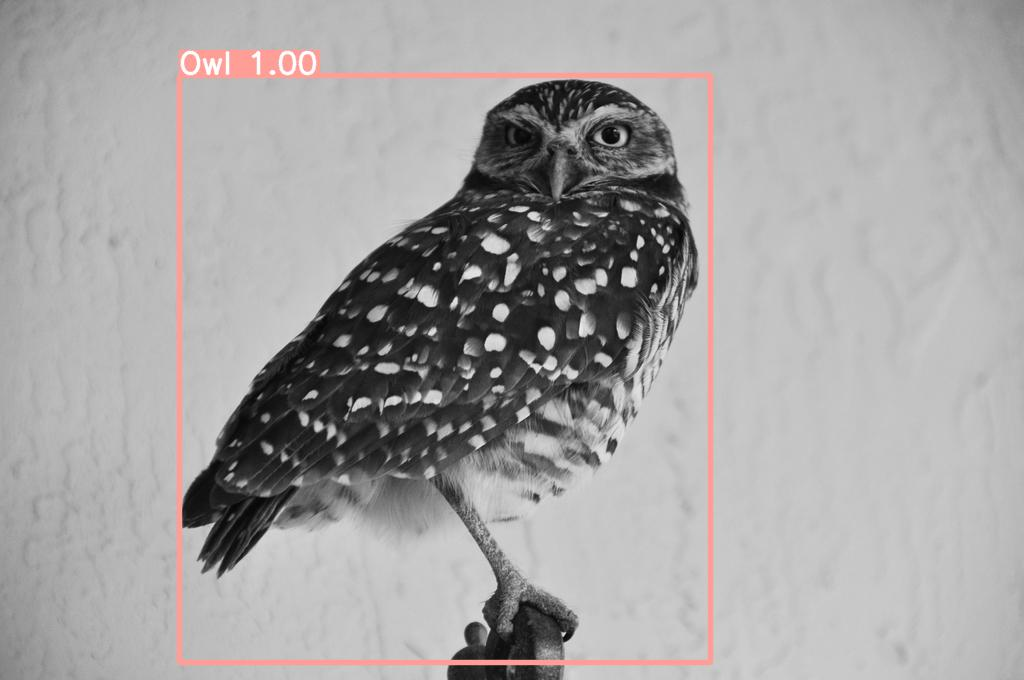

In [20]:
results_path = 'C:/Users/Ivona/Desktop/Codeasy/results4.jpg'
display(Image(filename=results_path, width=400, height=200))

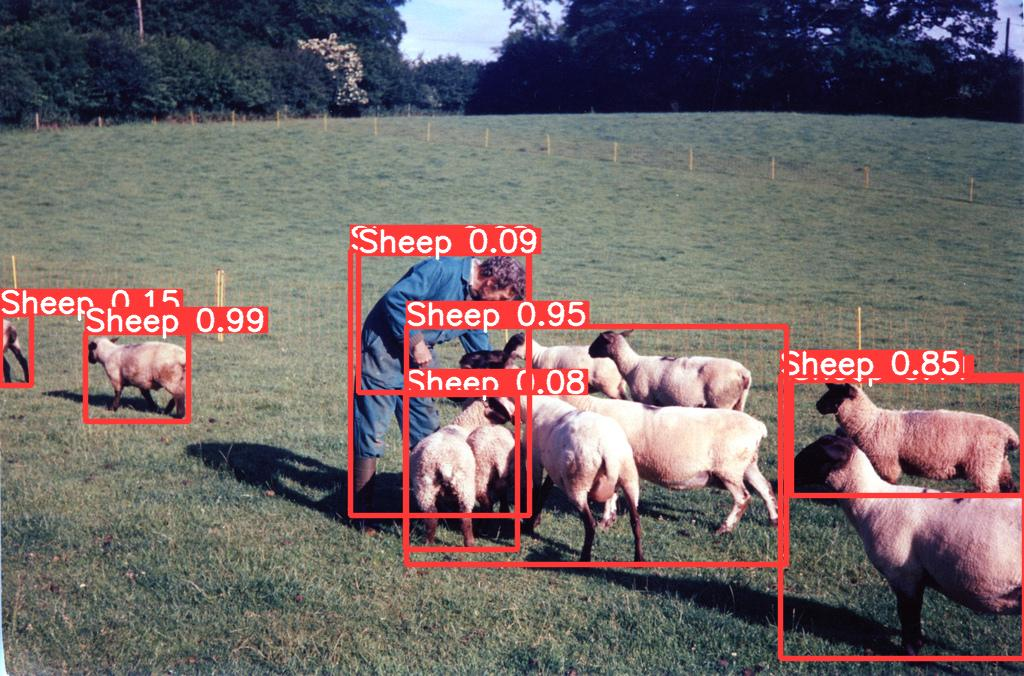

In [37]:
results_path = 'C:/Users/Ivona/Desktop/Codeasy/results3.jpg'
display(Image(filename=results_path, width=500, height=250))

Model uspješno detektira i locira objekte na slici, većinom s visokom sigurnošću. Dio pozadine i ljude pogrešno detektira kao ovce, što se može poboljšati ograničavanjem parametra conf (Confidence) na malo višu vrijednost, npr. 0.15.

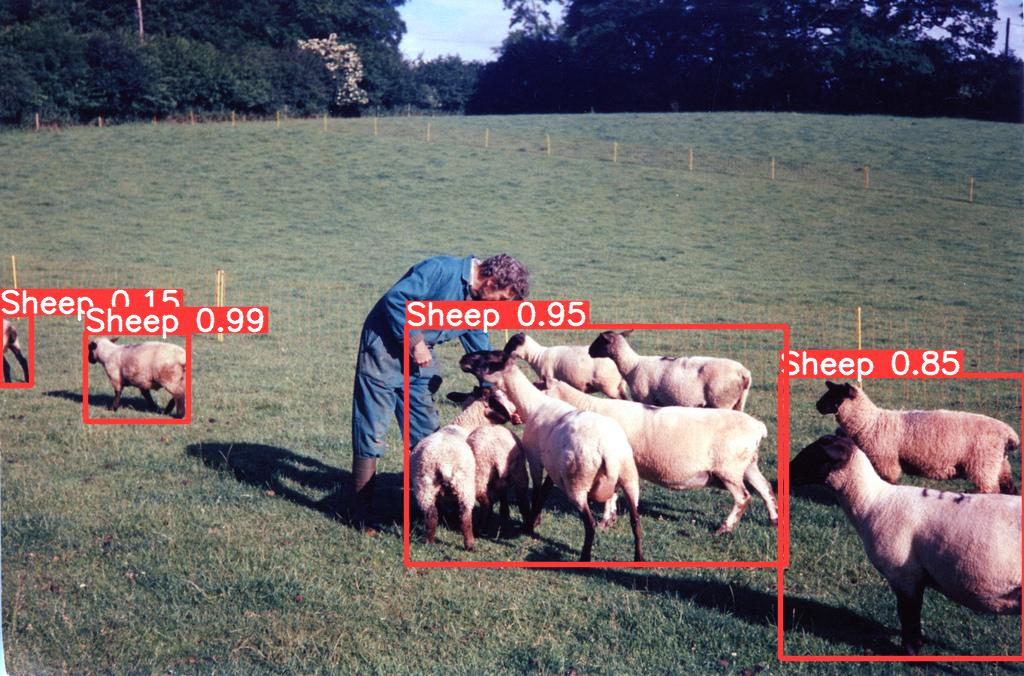

In [48]:
results_path = 'C:/Users/Ivona/Desktop/Codeasy/results5.jpg'
display(Image(filename=results_path, width=500, height=250))

### Vizualizacija točnosti

In [2]:
t = ['train27', 'train32', 'train33', 'train34']
p = 'C:/Users/Ivona/Desktop/Codeasy/runs/detect/'
dfs = []
for tr in t:
    putanja = p + str(tr) + '/results.csv'
    df = pd.read_csv(putanja)
    dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)

In [3]:
precision_metrics = ['   metrics/precision(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)']
loss_functions = ['           val/box_loss', '           val/cls_loss', '           val/dfl_loss']

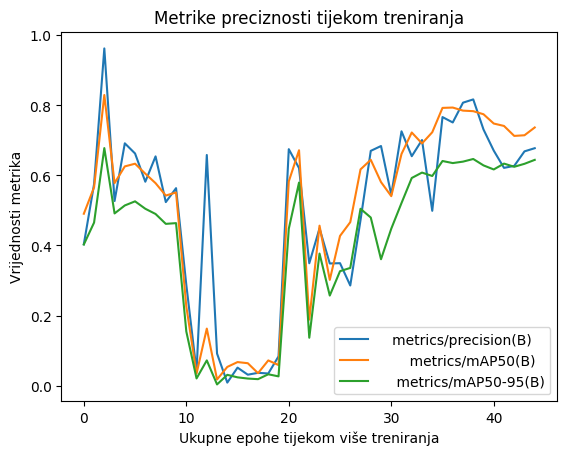

In [4]:
for pm in precision_metrics:
    plt.plot(merged_df[pm], label=pm)
plt.legend()
plt.title('Metrike preciznosti tijekom treniranja')
plt.xlabel('Ukupne epohe tijekom više treniranja')
plt.ylabel('Vrijednosti metrika')
plt.show()

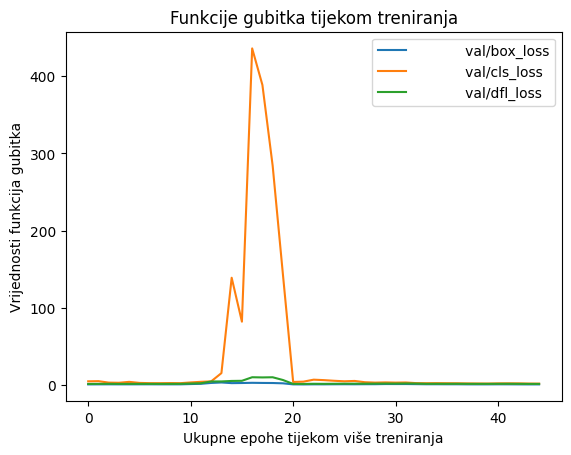

In [5]:
for lf in loss_functions:
    plt.plot(merged_df[lf], label=lf)
plt.legend()
plt.title('Funkcije gubitka tijekom treniranja')
plt.xlabel('Ukupne epohe tijekom više treniranja')
plt.ylabel('Vrijednosti funkcija gubitka')
plt.show()

Pad točnosti i porast funkcije gubitka prisutan je kad je korišten optimizator Adam i manji batch size.

S obzirom na kretanje metrika preciznosti i funkcija gubitka, rezultate validacije i detekciju na skupu za testiranje, model iz train33 ima najbolju izvedbu. Preciznost pri detekciji bounding boxes ukupno je 76%, na slikama ovaca 60%, a na slikama sova čak 93%. Odziv također ima dobre vrijednosti: ukupno 75% na cijelom validacijskom skupu, tj. 66% na slikama ovaca i 83% na slikama sova. Metrika mAP postiže vrijednost od oko 78%, na slikama ovaca 61%, a na slikama sova 95%. Metrika mAP50-95 također ima nešto bolje rezultate na slikama sova: vrijednost na cijelom skupu je oko 64%, na slikama ovaca 44%, a na slikama sova 83%.

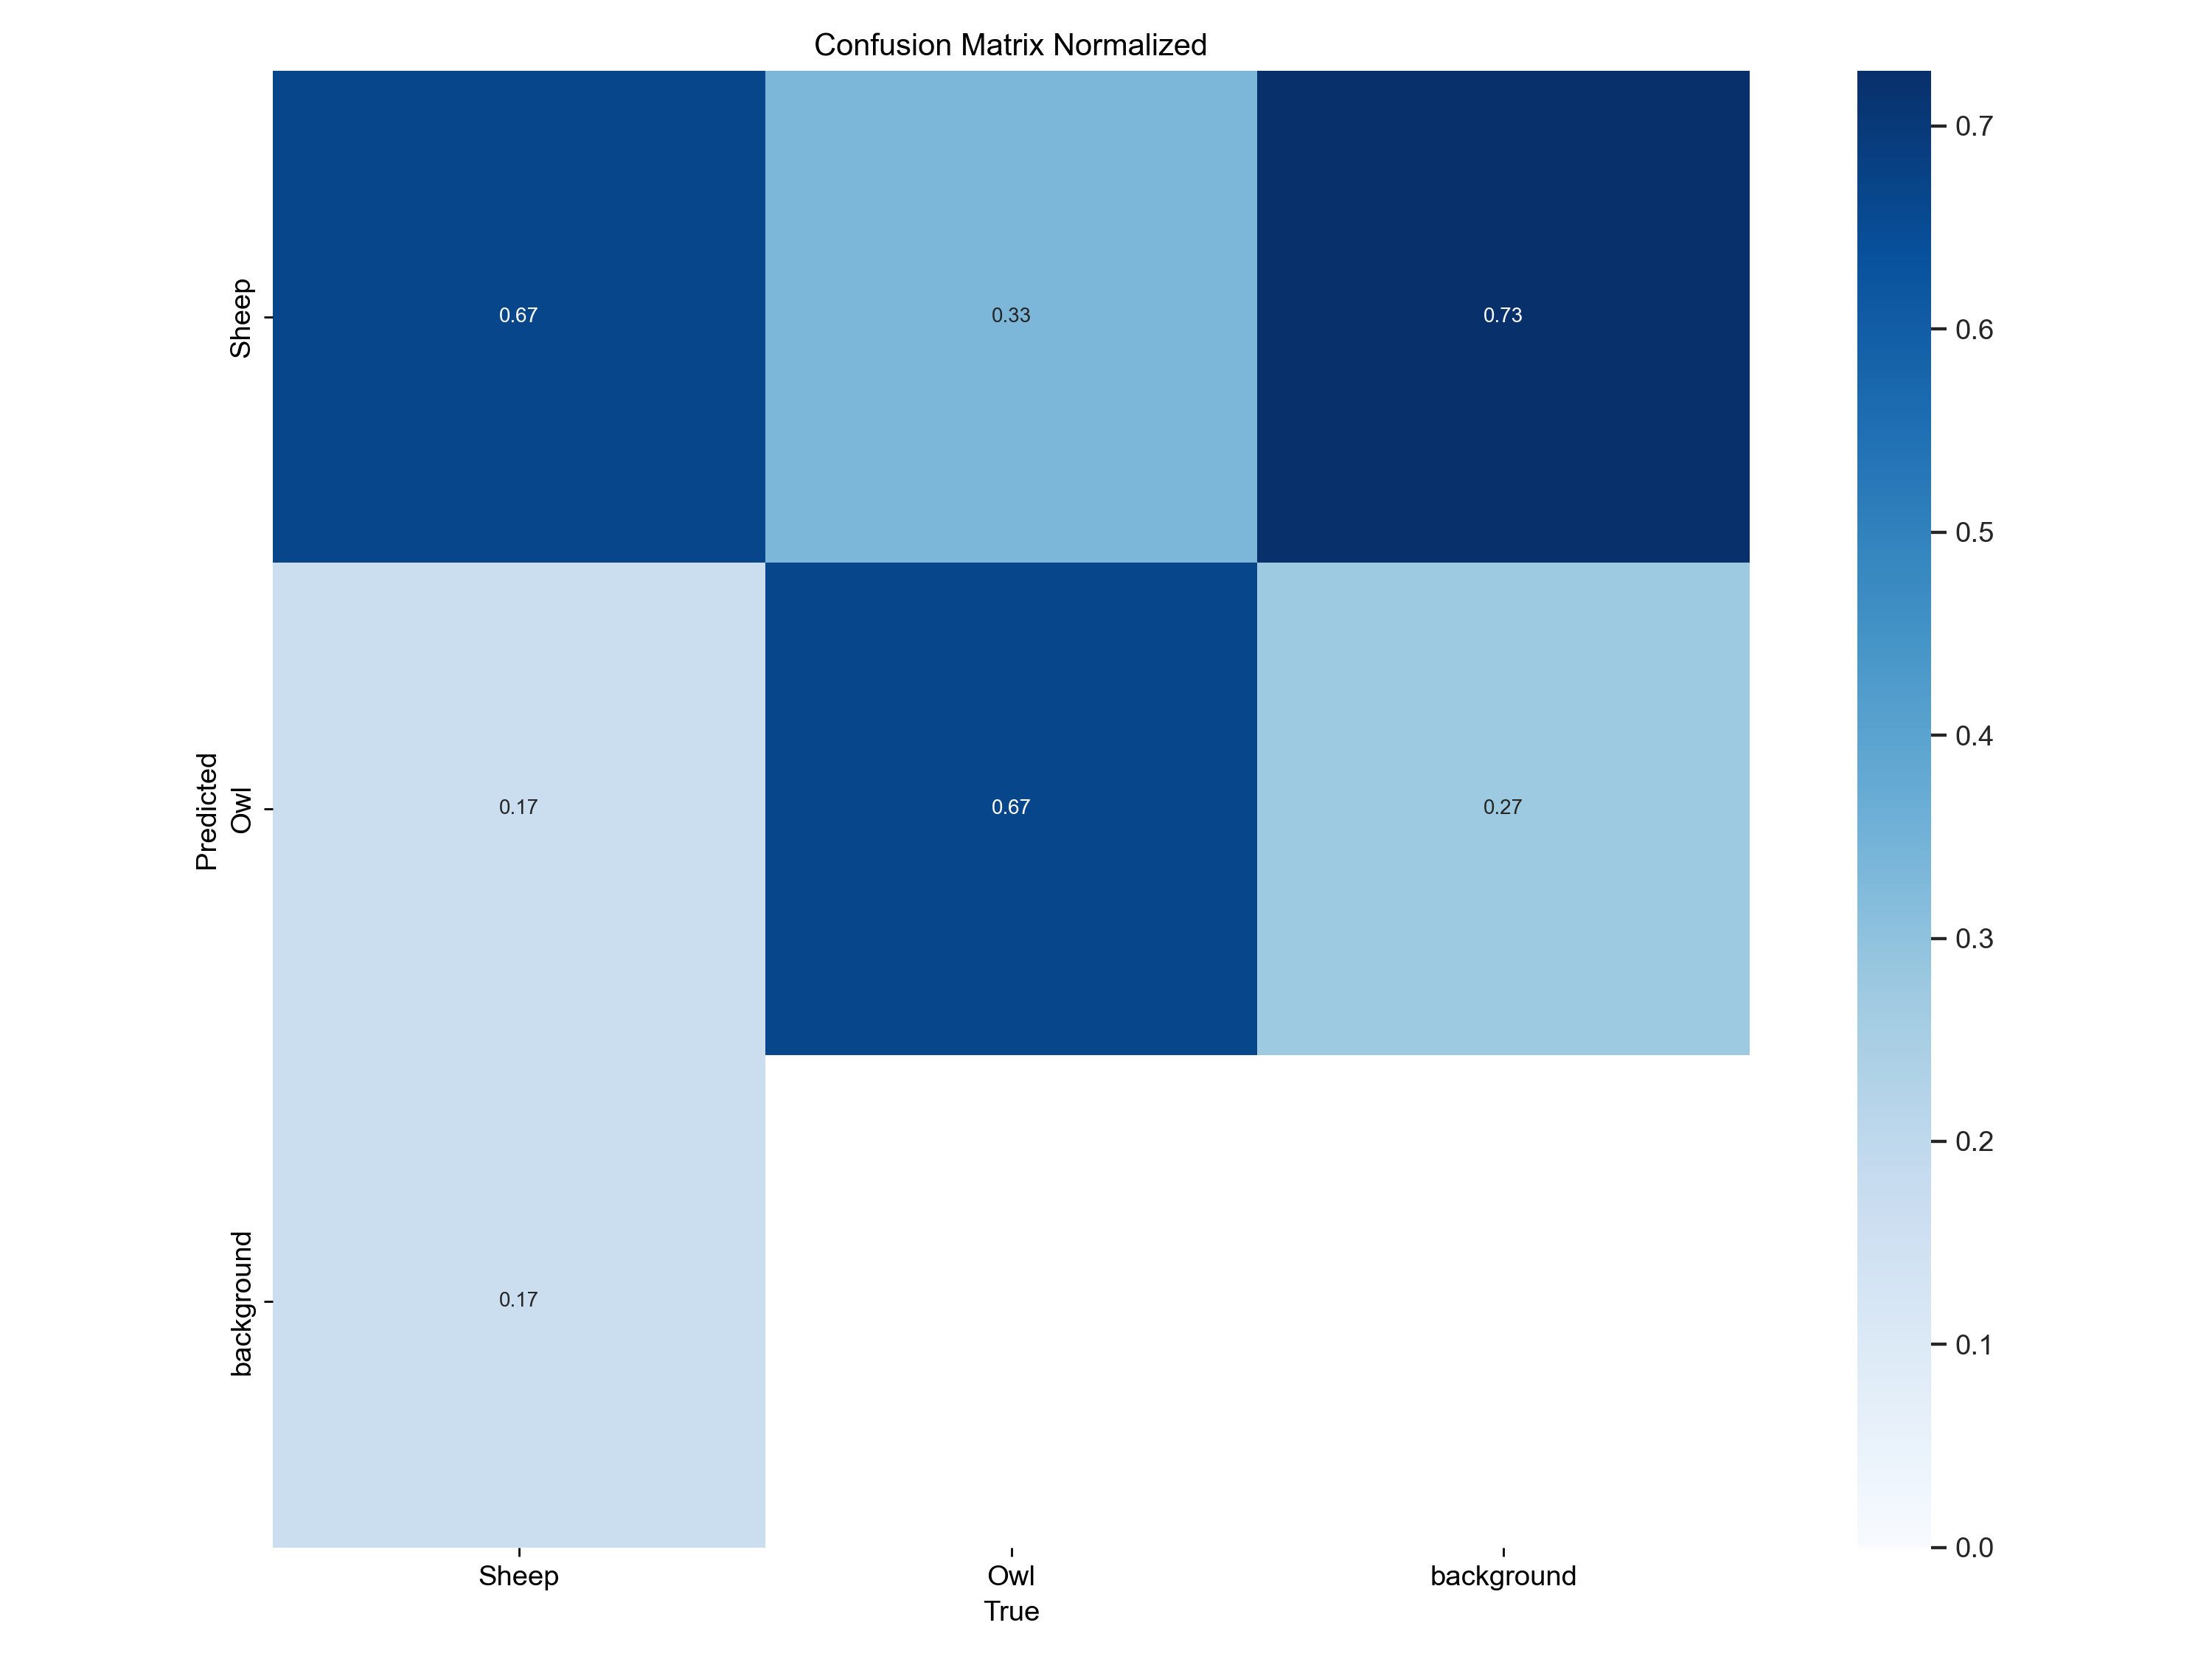

In [80]:
matrix_path = 'C:/Users/Ivona/Desktop/Codeasy/runs/detect/train33/confusion_matrix_normalized.png'
display(Image(filename=matrix_path, width=800, height=700))

Matrica konfuzije dobivena za vrijeme treniranja pokazuje uglavnom dobru detekciju samih sova i ovaca, ali model griješi pri pokušajima da pozadinu detektira kao jedan od objekata.

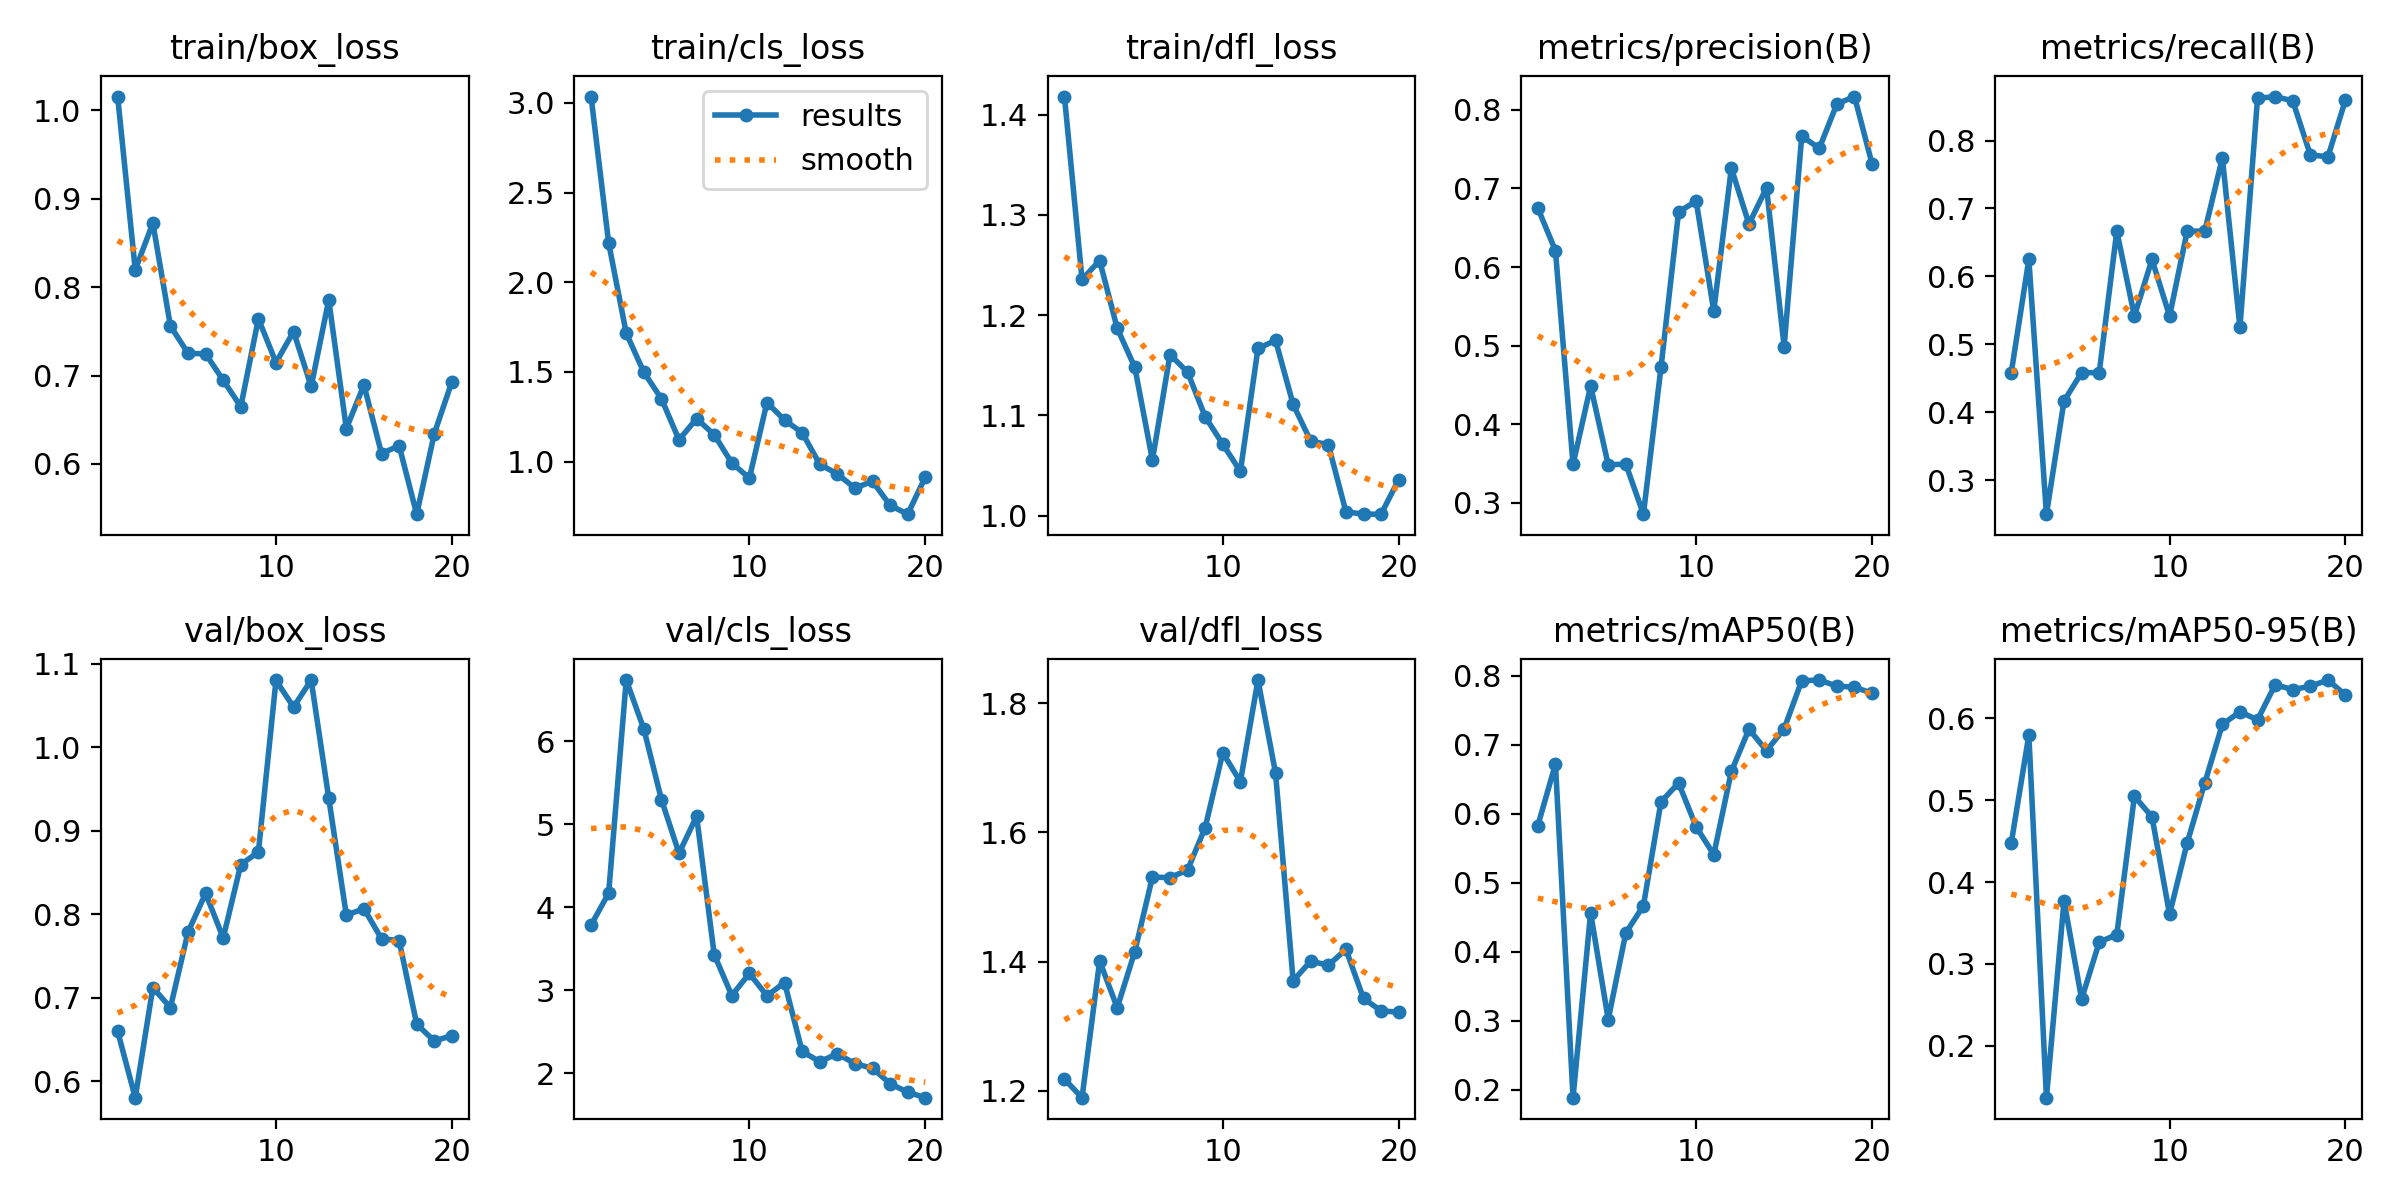

In [79]:
image_path = 'C:/Users/Ivona/Desktop/Codeasy/runs/detect/train33/results.png'
display(Image(filename=image_path, width=700))

Pri treniranju model je pokazao najbolje rezultate za težine iz train33, što potvrđuje prikaz kretanja metrika. Gubitak na skupu za validaciju pokazuje nagli pad, dok svim metrikama preciznosti i odzivu vrijednosti bilježe rast. U nastavku je prikazana detekcija modela na validacijskom skupu.

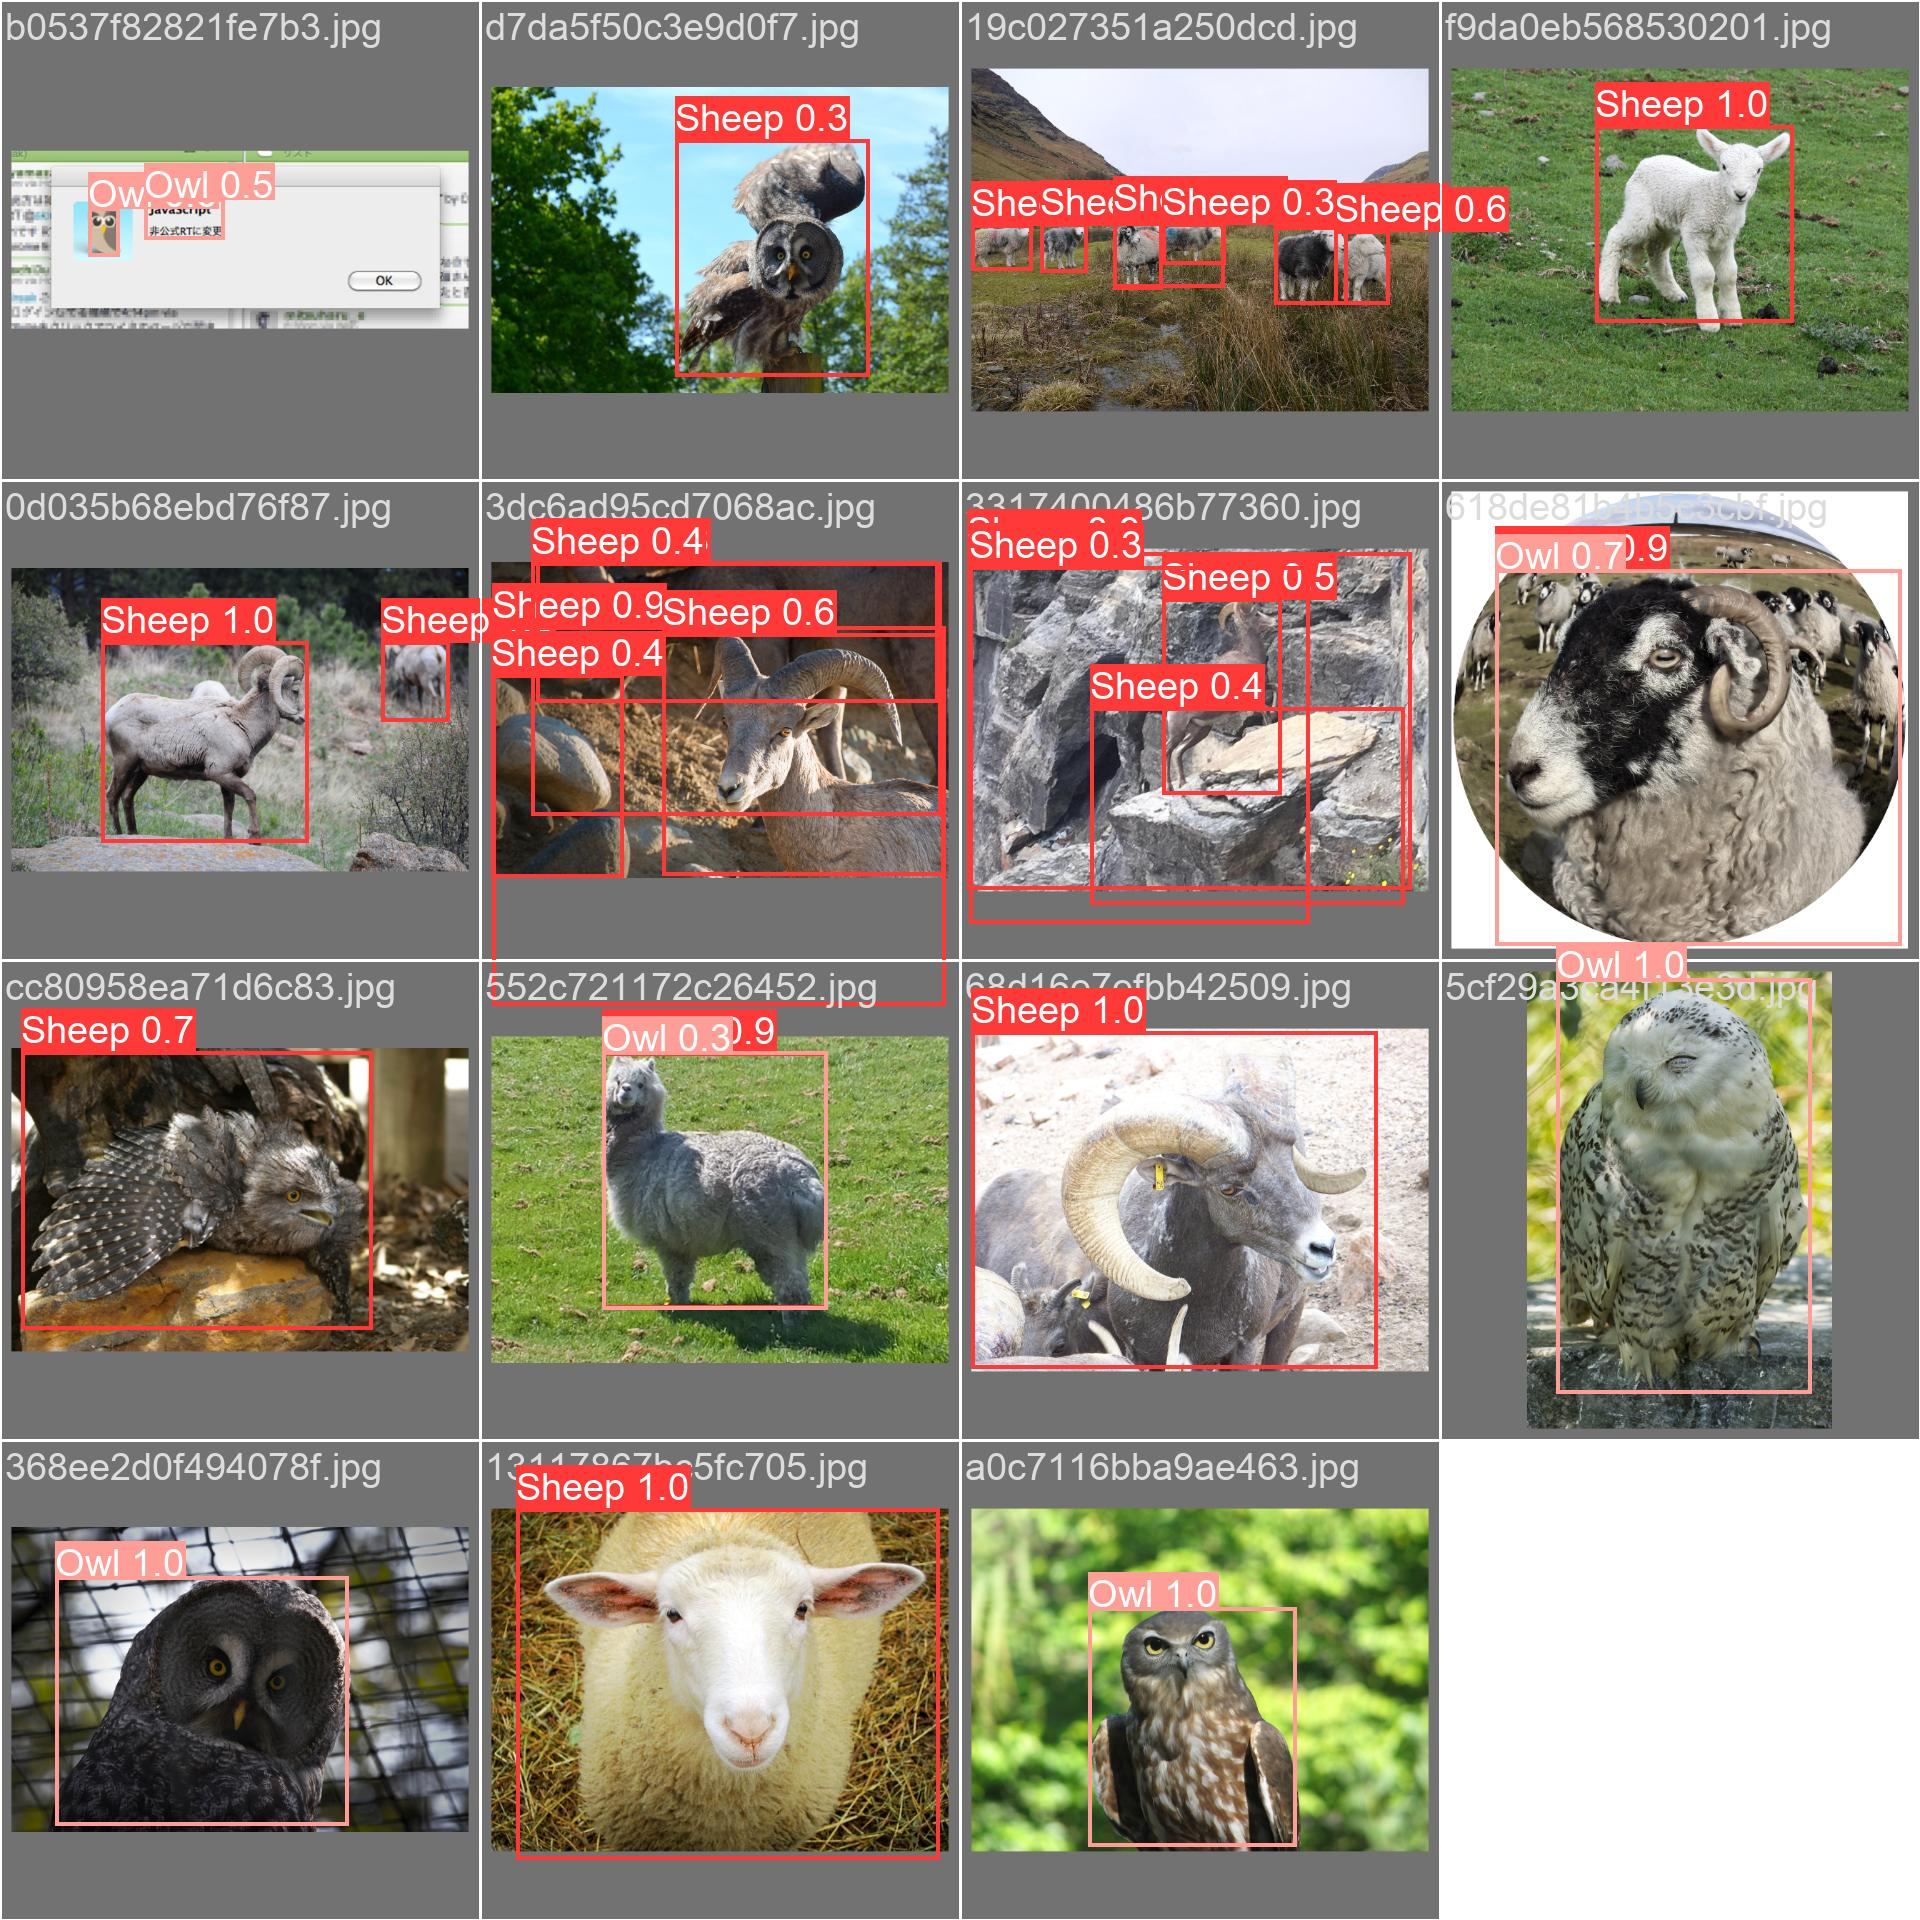

In [77]:
image_path = 'C:/Users/Ivona/Desktop/Codeasy/runs/detect/train33/val_batch0_pred.jpg'
display(Image(filename=image_path, width=500))

U usporedbi s ostalim modelima, ovaj model postiže sličnu točnost kao model iz train20 i može se smatrati solidnim, ali pokazuje pristranost i nešto bolje detektiranje sova nego ovaca.